In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

In [2]:
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv(r"C:\Users\thahi\OneDrive\文件\Job\Data Analysis\Project\Python\Pandas\crime.csv", nrows=10, encoding=encoding)
        print(encoding)
    except:
        pass

cp1258
cp1250
cp862
cp1253
iso8859_10
iso8859_2
iso8859_15
iso8859_7
cp858
cp932
kz1048
cp775
mbcs
gb18030
cp1252
cp949
mac_roman
cp855
cp1255
cp857
iso8859_5
iso8859_9
big5hkscs
cp1254
cp1125
cp1256
mac_iceland
mac_greek
cp037
cp863
cp860
cp1257
mac_latin2
iso8859_11
ptcp154
utf_16_be
iso8859_6
cp864
iso8859_13
iso8859_16
iso8859_8
cp1251
cp850
cp1140
utf_16_le
hp_roman8
mac_cyrillic
cp861
cp437
cp869
cp865
cp1026
cp273
iso8859_3
koi8_r
cp852
gbk
iso8859_14
cp500
iso8859_4
mac_turkish
cp866
latin_1


In [3]:
crime = pd.read_csv(r"C:\Users\thahi\OneDrive\文件\Job\Data Analysis\Project\Python\Pandas\crime.csv", encoding="ISO-8859-11")
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
crime.shape

(319073, 17)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [6]:
crime.duplicated().sum()     

23

In [7]:
# Drop duplicate rows

crime.drop_duplicates(inplace=True)

In [8]:
crime.shape

(319050, 17)

In [9]:
# Convert the datatype of date column to datetime

crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])     

In [11]:
# Extracting week info to check the date column datatype

crime['OCCURRED_ON_DATE'].dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [10]:
# Take a look at the quick overview of key statistical measures 

crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [12]:
# All columns

crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [13]:
# All columns with null/missing values

crime.columns[crime.isnull().sum() != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [14]:
# No. of unique values of all columns

for col in crime.columns:
    print(" Column: " + col + " ,  Unique values: " + str(crime[col].nunique()) )

 Column: INCIDENT_NUMBER ,  Unique values: 282517
 Column: OFFENSE_CODE ,  Unique values: 222
 Column: OFFENSE_CODE_GROUP ,  Unique values: 67
 Column: OFFENSE_DESCRIPTION ,  Unique values: 244
 Column: DISTRICT ,  Unique values: 12
 Column: REPORTING_AREA ,  Unique values: 879
 Column: SHOOTING ,  Unique values: 1
 Column: OCCURRED_ON_DATE ,  Unique values: 233229
 Column: YEAR ,  Unique values: 4
 Column: MONTH ,  Unique values: 12
 Column: DAY_OF_WEEK ,  Unique values: 7
 Column: HOUR ,  Unique values: 24
 Column: UCR_PART ,  Unique values: 4
 Column: STREET ,  Unique values: 4657
 Column: Lat ,  Unique values: 18178
 Column: Long ,  Unique values: 18178
 Column: Location ,  Unique values: 18194


In [15]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## Exploratory Data Analyst

In [148]:
# Most crime incidents in terms of OFFENSE_CODE_GROUP

top_offense_crimes = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
top_offense_crimes


OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

In [17]:
# Most crime incident rate in terms of OFFENSE_CODE_GROUP w.r.t total crimes

rate = top_offense_crimes/crime.shape[0]
rate

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

<Axes: title={'center': ' Top 10 offense groups (%of total crimes)'}>

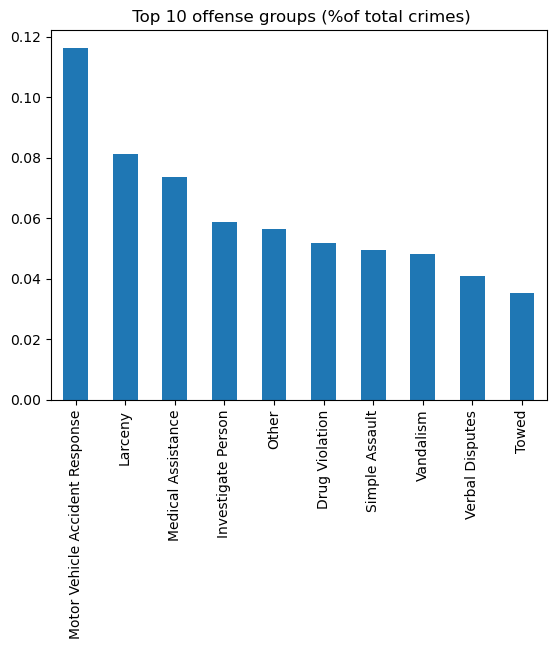

In [157]:
# Plot the data

rate.plot(kind='bar', title = " Top 10 offense groups (%of total crimes)", xlabel='')

In [46]:
# Most crime incidents in terms of OFFENSE_DESCRIPTION

top_desc=crime['OFFENSE_DESCRIPTION'].value_counts()[:10]
top_desc

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

<Axes: title={'center': ' Top 10 offense descriptions (%of total crimes)'}>

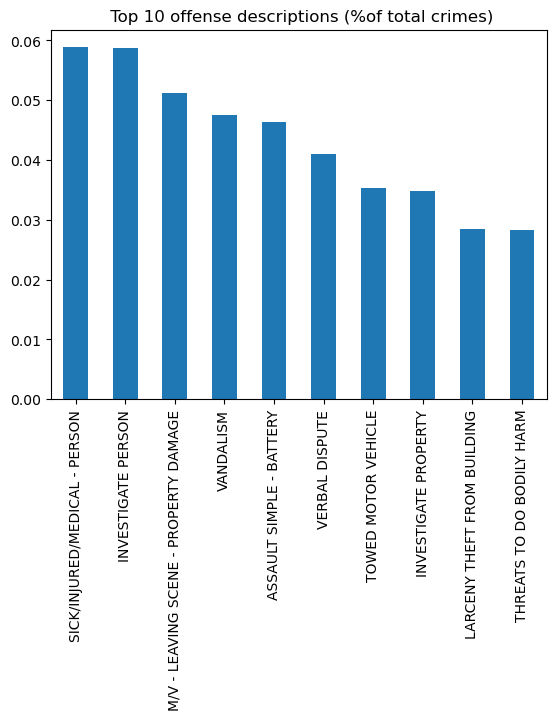

In [159]:
# Most crime incident rate in terms of OFFENSE_DESCRIPTION w.r.t total crimes

(top_desc/crime.shape[0]).plot(kind='bar', title = " Top 10 offense descriptions (%of total crimes)", xlabel='')

<Axes: >

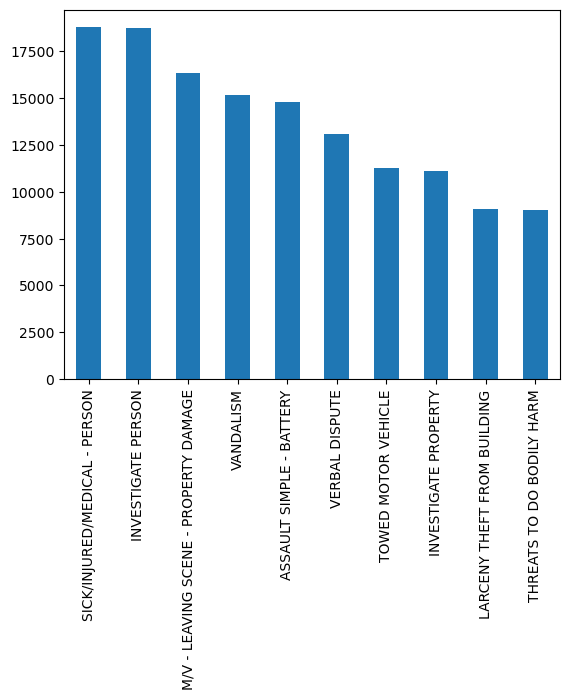

In [161]:
(crime['OFFENSE_DESCRIPTION'].value_counts()[:10]).plot(kind='bar', xlabel='')

In [84]:
# Least common offense groups

crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

<Axes: title={'center': 'Crimes reported each year'}, xlabel='YEAR', ylabel='No. of Crimes'>

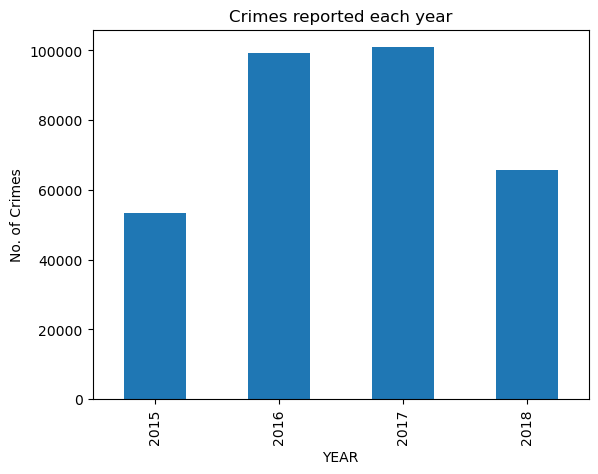

In [175]:
# Which year has the most crime incidents

(crime.groupby('YEAR')['INCIDENT_NUMBER'].count()).plot(kind='bar', title = 'Crimes reported each year', ylabel = 'No. of Crimes')

<Axes: title={'center': 'No. of crimes each hour'}, xlabel='HOUR'>

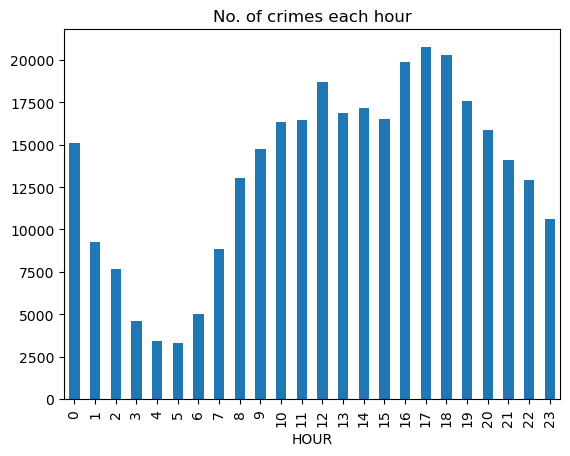

In [243]:
# Which hour of the day were the crimes most reported?

(crime.groupby('HOUR')['INCIDENT_NUMBER'].count()).plot(kind='bar', title='No. of crimes each hour')

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

<Axes: title={'center': 'No. of crimes each day of week'}, xlabel='DAY_OF_WEEK'>

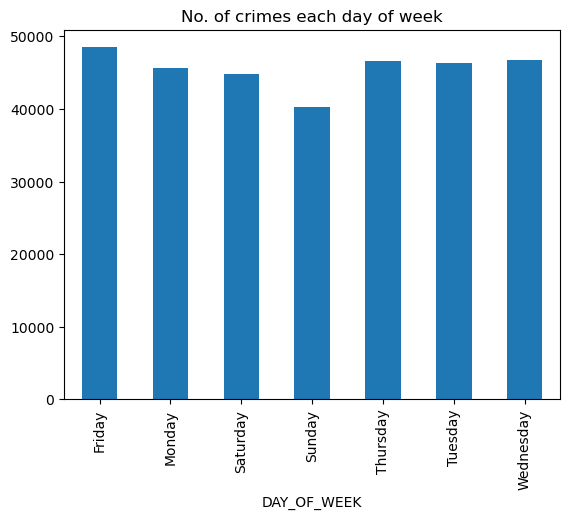

In [253]:
# Which day of the week were the crimes most reported?

display((crime.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count()). sort_values(ascending=False))
(crime.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count()).plot(kind='bar', title='No. of crimes each day of week')

In [130]:
# On which hour and day of the week were more crimes committed?

hour_day_crime = (crime.groupby(['HOUR','DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().unstack())
hour_day_crime

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [132]:
# Rearrange the weekdays

hour_day_crime.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day_crime

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


<Axes: ylabel='HOUR'>

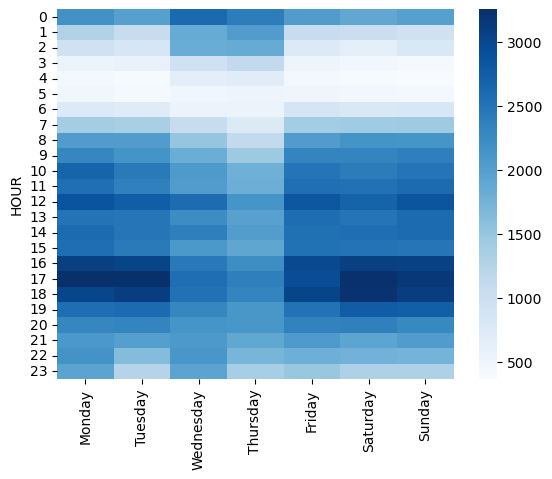

In [146]:
# Plot a heatmap

sns.heatmap(hour_day_crime, cmap='Blues')

In [181]:
# Same can be done using a pivot table as well

pivot_hour_crime = crime.pivot_table(index='HOUR', columns = 'DAY_OF_WEEK', values = 'INCIDENT_NUMBER', aggfunc = 'count')
pivot_hour_crime.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_hour_crime

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [ ]:
# In which months were the crimes committed below the total average?
# In which months on average did the most crimes occur?

In [199]:
avg_crime = crime.groupby(['YEAR', 'MONTH'])['INCIDENT_NUMBER'].count().mean()
print("The average no. of crimes reported is " + str(avg_crime))

The average no. of crimes reported is 7976.25


In [211]:
crime.pivot_table(index='MONTH', columns='YEAR', values='INCIDENT_NUMBER', aggfunc='count')

YEAR,2015,2016,2017,2018
MONTH,,,,
1,NaN,7835.0,7991.0,7782.0
2,NaN,7307.0,7408.0,6937.0
3,NaN,8199.0,8179.0,7768.0
4,NaN,8101.0,8069.0,7916.0
5,NaN,8578.0,8715.0,8906.0
6,4188.0,8558.0,8985.0,8834.0
7,8322.0,8618.0,9075.0,8538.0
8,8340.0,8938.0,9206.0,8337.0
9,8411.0,8521.0,8940.0,667.0


In [235]:
# In which districts where the most crimes committed on yearly basis

pivot_dist_crime = crime.pivot_table(index='DISTRICT', columns='YEAR', values='INCIDENT_NUMBER', aggfunc='count')
pivot_dist_crime

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

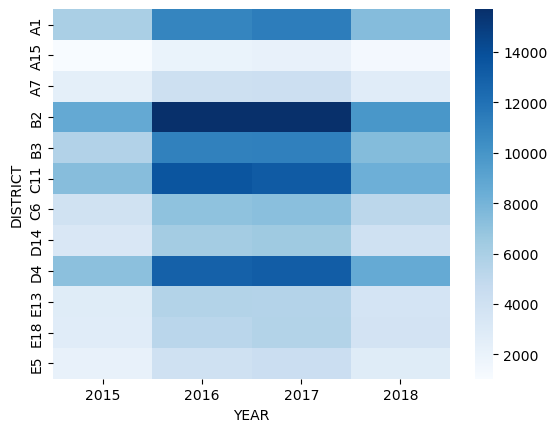

In [241]:
# Plot the data using heatmap 

sns.heatmap(pivot_dist_crime, cmap = 'Blues')